I am defining a similarity Matrix for the two seperate graph. Then using the power of similarity matrix, i will be trying to strengthen the previously unknown or weak connections.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, pi, round
from numpy.linalg import inv
from numpy.linalg import matrix_rank as rank
!rm bug_numpy_utils.py # just in case
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint, CData

rm: cannot remove 'bug_numpy_utils.py': No such file or directory
--2023-11-23 12:08:30--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14157 (14K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  13.83K  --.-KB/s    in 0s      

2023-11-23 12:08:30 (121 MB/s) - ‘bug_numpy_utils.py’ saved [14157/14157]



In [3]:
similarity_matrix = np.array( [[1, 1, 0, 0, 0, 0, 0, 0],
                               [1, 1, 1, 0, 0, 0, 0, 0],
                               [0, 1, 1, 1, 0, 0, 0, 0],
                               [0, 0, 1, 1, 0, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 0],
                               [0, 0, 0, 0, 0, 1, 1, 1],
                               [0, 0, 0, 0, 0, 0, 1, 1]])

Take square of similarity matrix to strengthen the immediate neighbours

In [4]:
squared = (similarity_matrix @ similarity_matrix)
MatPrint(squared)

Matrix:
|     2.00     2.00     1.00     0.00     0.00     0.00     0.00     0.00 |
|     2.00     3.00     2.00     1.00     0.00     0.00     0.00     0.00 |
|     1.00     2.00     3.00     2.00     0.00     0.00     0.00     0.00 |
|     0.00     1.00     2.00     2.00     0.00     0.00     0.00     0.00 |
|     0.00     0.00     0.00     0.00     2.00     2.00     1.00     0.00 |
|     0.00     0.00     0.00     0.00     2.00     3.00     2.00     1.00 |
|     0.00     0.00     0.00     0.00     1.00     2.00     3.00     2.00 |
|     0.00     0.00     0.00     0.00     0.00     1.00     2.00     2.00 |


In [5]:
squared[(squared > 1)] = 1
MatPrint(squared)

Matrix:
|     1.00     1.00     1.00     0.00     0.00     0.00     0.00     0.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00 |
|     0.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00     0.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00     1.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00     1.00 |
|     0.00     0.00     0.00     0.00     0.00     1.00     1.00     1.00 |


Take cube to strengthen the indirect neighbours

In [6]:
cube = (similarity_matrix @ similarity_matrix @ similarity_matrix)
cube[(cube > 1)] = 1
MatPrint(cube)

Matrix:
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00     1.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00     1.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00     1.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00     1.00 |


Graph under observation:

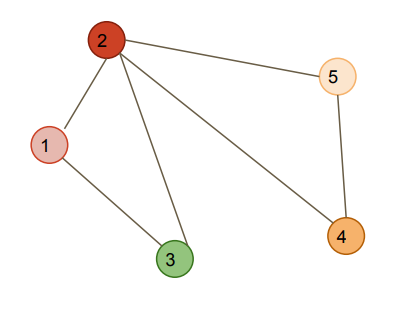

Forming the adjacency Matrix


In [7]:
A = np.array( [ [0,1,1,0,0],[1,0,1,1,1],[1,1,0,0,0],[0,1,0,0,1],[0,1,0,1,0] ] )
MatPrint(A)

Matrix:
|     0.00     1.00     1.00     0.00     0.00 |
|     1.00     0.00     1.00     1.00     1.00 |
|     1.00     1.00     0.00     0.00     0.00 |
|     0.00     1.00     0.00     0.00     1.00 |
|     0.00     1.00     0.00     1.00     0.00 |


Degree Matrix : stores degree of each node in its diagonal

In [8]:
D = np.array([[2,0,0,0,0],[0,4,0,0,0],[0,0,2,0,0],[0,0,0,2,0],[0,0,0,0,2]])
MatPrint(D)

Matrix:
|     2.00     0.00     0.00     0.00     0.00 |
|     0.00     4.00     0.00     0.00     0.00 |
|     0.00     0.00     2.00     0.00     0.00 |
|     0.00     0.00     0.00     2.00     0.00 |
|     0.00     0.00     0.00     0.00     2.00 |


Computing the laplacian L= D - A

In [9]:
L = D - A
MatPrint(L)

Matrix:
|     2.00    -1.00    -1.00     0.00     0.00 |
|    -1.00     4.00    -1.00    -1.00    -1.00 |
|    -1.00    -1.00     2.00     0.00     0.00 |
|     0.00    -1.00     0.00     2.00    -1.00 |
|     0.00    -1.00     0.00    -1.00     2.00 |


In [10]:
eigenvalues, eigenvectors = np.linalg.eig(L)
print(' These are eigen vectors of the Laplacian: \n')
print(eigenvalues)
print('\n')
print(' These are eigen vectors of the Laplacian: \n')
MatPrint(eigenvectors)


 These are eigen vectors of the Laplacian: 

[5.00000000e+00 3.00000000e+00 1.35853854e-16 1.00000000e+00
 3.00000000e+00]


 These are eigen vectors of the Laplacian: 

Matrix:
|     0.22    -0.71     0.45     0.50    -0.03 |
|    -0.89    -0.00     0.45    -0.00     0.00 |
|     0.22     0.71     0.45     0.50     0.03 |
|     0.22    -0.00     0.45    -0.50    -0.71 |
|     0.22    -0.00     0.45    -0.50     0.71 |


Now i will divide the above graph into two components mkaing 1,2,5 one comp and 3,4 the other

In [11]:
A_dis = np.array([[0,1,0,0,0],[1,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0],[0,1,0,0,0]])
MatPrint(A_dis)

Matrix:
|     0.00     1.00     0.00     0.00     0.00 |
|     1.00     0.00     0.00     0.00     1.00 |
|     0.00     0.00     0.00     1.00     0.00 |
|     0.00     0.00     1.00     0.00     0.00 |
|     0.00     1.00     0.00     0.00     0.00 |


In [12]:
D_dis = np.array([[1,0,0,0,0],[0,2,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
MatPrint(D_dis)

Matrix:
|     1.00     0.00     0.00     0.00     0.00 |
|     0.00     2.00     0.00     0.00     0.00 |
|     0.00     0.00     1.00     0.00     0.00 |
|     0.00     0.00     0.00     1.00     0.00 |
|     0.00     0.00     0.00     0.00     1.00 |


In [13]:
L_dis = D_dis - A_dis
MatPrint(L_dis)

Matrix:
|     1.00    -1.00     0.00     0.00     0.00 |
|    -1.00     2.00     0.00     0.00    -1.00 |
|     0.00     0.00     1.00    -1.00     0.00 |
|     0.00     0.00    -1.00     1.00     0.00 |
|     0.00    -1.00     0.00     0.00     1.00 |


In [14]:
eigenvalues_dis, eigenvectors_dis = np.linalg.eig(L_dis)
print(' These are eigen vectors of the Laplacian: \n')
print(eigenvalues_dis)
print('\n')
print(' These are eigen vectors of the Laplacian: \n')
MatPrint(eigenvectors_dis)


 These are eigen vectors of the Laplacian: 

[ 3.00000000e+00  1.00000000e+00 -3.36770206e-17  2.00000000e+00
  0.00000000e+00]


 These are eigen vectors of the Laplacian: 

Matrix:
|    -0.41    -0.71     0.58     0.00     0.00 |
|     0.82     0.00     0.58     0.00     0.00 |
|     0.00     0.00     0.00    -0.71     0.71 |
|     0.00     0.00     0.00     0.71     0.71 |
|    -0.41     0.71     0.58     0.00     0.00 |


Forming the incidence matrix for the single connected graph

In [15]:
j = np.array([[1,1,0,0,0,0],[1,0,1,1,1,0],[0,1,1,0,0,0],[0,0,0,1,0,1],[0,0,0,0,1,1]])
MatPrint(j)

Matrix:
|     1.00     1.00     0.00     0.00     0.00     0.00 |
|     1.00     0.00     1.00     1.00     1.00     0.00 |
|     0.00     1.00     1.00     0.00     0.00     0.00 |
|     0.00     0.00     0.00     1.00     0.00     1.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00 |


In [16]:
j = np.array([[1,1,0,0,0],[1,0,1,0,0],[0,1,1,0,0],[0,1,0,1,0],[0,1,0,0,1],[0,0,0,1,1]])
MatPrint(j)

Matrix:
|     1.00     1.00     0.00     0.00     0.00 |
|     1.00     0.00     1.00     0.00     0.00 |
|     0.00     1.00     1.00     0.00     0.00 |
|     0.00     1.00     0.00     1.00     0.00 |
|     0.00     1.00     0.00     0.00     1.00 |
|     0.00     0.00     0.00     1.00     1.00 |


In [17]:
L_v2 =np.transpose(j) @ j
print("computing L with j.T @ j \n")
MatPrint(L_v2)
print("\n")
print("previously computed L \n")
MatPrint(L)

computing L with j.T @ j 

Matrix:
|     2.00     1.00     1.00     0.00     0.00 |
|     1.00     4.00     1.00     1.00     1.00 |
|     1.00     1.00     2.00     0.00     0.00 |
|     0.00     1.00     0.00     2.00     1.00 |
|     0.00     1.00     0.00     1.00     2.00 |


previously computed L 

Matrix:
|     2.00    -1.00    -1.00     0.00     0.00 |
|    -1.00     4.00    -1.00    -1.00    -1.00 |
|    -1.00    -1.00     2.00     0.00     0.00 |
|     0.00    -1.00     0.00     2.00    -1.00 |
|     0.00    -1.00     0.00    -1.00     2.00 |


In [18]:
eigenvalues_v2, eigenvectors_v2 = np.linalg.eig(L_v2)
print(' These are eigen values of the Laplacian: \n')
print(eigenvalues_v2)
print('\n')
print(' These are eigen vectors of the Laplacian: \n')
MatPrint(eigenvectors_v2)

 These are eigen values of the Laplacian: 

[5.56155281 3.         1.         1.43844719 1.        ]


 These are eigen vectors of the Laplacian: 

Matrix:
|     0.31     0.50    -0.71    -0.39    -0.01 |
|     0.79     0.00    -0.00     0.62     0.00 |
|     0.31     0.50     0.71    -0.39     0.01 |
|     0.31    -0.50     0.00    -0.39    -0.71 |
|     0.31    -0.50     0.00    -0.39     0.71 |


what if i had made a cut to seperate 1,2,3 and 4,5

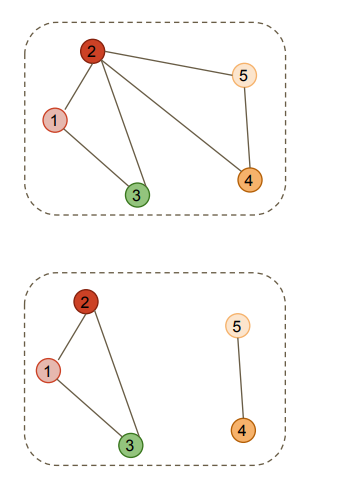

In [19]:
ADJ = np.array([ [0,1,1,0,0],[1,0,1,0,0],[1,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0] ])
Deg = np.array([ [2,0,0,0,0],[0,2,0,0,0],[0,0,2,0,0],[0,0,0,1,0],[0,0,0,0,1]])

In [20]:
L_v3 = Deg - ADJ
MatPrint(L_v3)
eigenvalues_v3, eigenvectors_v3 = np.linalg.eig(L_v3)
print(' These are eigen values of the Laplacian: \n')
print(eigenvalues_v3)
print('\n')
print(' These are eigen vectors of the Laplacian: \n')
MatPrint(eigenvectors_v3)

Matrix:
|     2.00    -1.00    -1.00     0.00     0.00 |
|    -1.00     2.00    -1.00     0.00     0.00 |
|    -1.00    -1.00     2.00     0.00     0.00 |
|     0.00     0.00     0.00     1.00    -1.00 |
|     0.00     0.00     0.00    -1.00     1.00 |
 These are eigen values of the Laplacian: 

[ 3.0000000e+00 -4.4408921e-16  3.0000000e+00  2.0000000e+00
  0.0000000e+00]


 These are eigen vectors of the Laplacian: 

Matrix:
|     0.82    -0.58     0.29     0.00     0.00 |
|    -0.41    -0.58    -0.81     0.00     0.00 |
|    -0.41    -0.58     0.51     0.00     0.00 |
|     0.00     0.00     0.00     0.71     0.71 |
|     0.00     0.00     0.00    -0.71     0.71 |


Defining my own Similarity funtion, degreee matrix and calculating the laplacian of the graph as L= D - S .  The graph is shown below with each edge assigned a particular weight

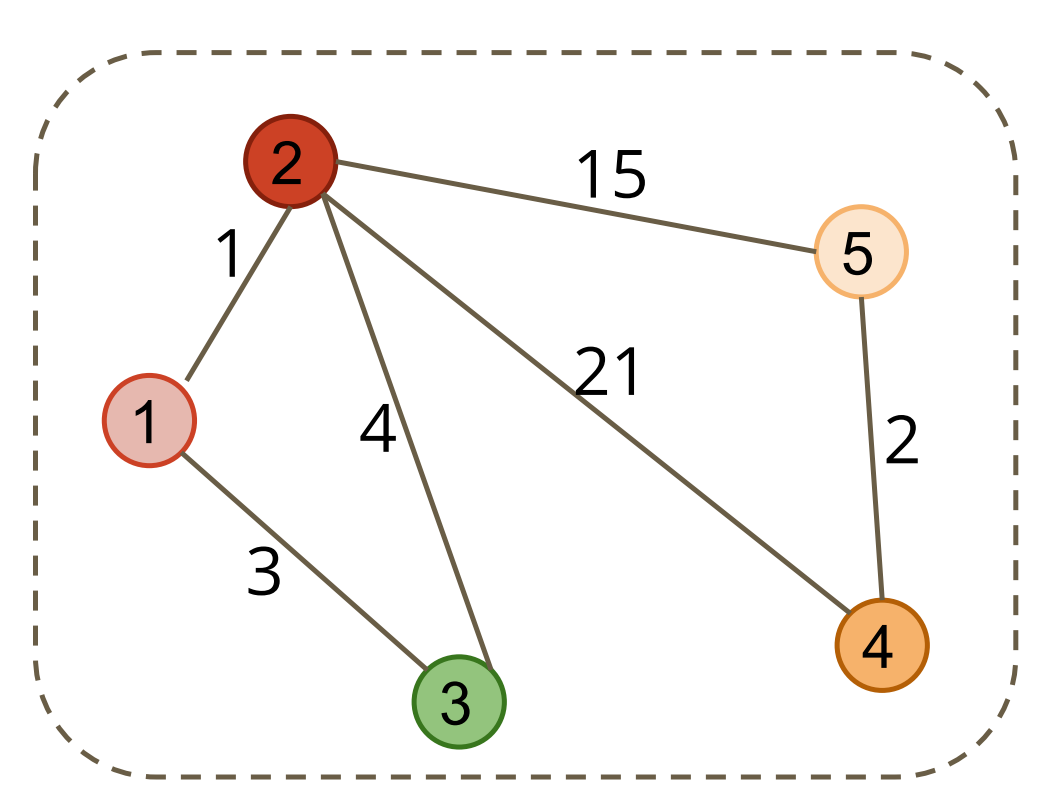

The similarity Matrix is:  1/(weight of the edge) ; higher the value, the more similar are two adjacent edges. I have defined non adjacent edges as 0. And self similarity as 0 as well.  

The degree Matrix is simply row wise sum of similarity Matrix, such that each row represents each vertix


In [21]:
S = np.array([ [0,1,0.333,0,0], [1,0,0.25,0.0476,0.0667],[0.333,0.25,0,0,0],[0,0.476,0,0,0.5],[0,0.0667,0,0.5,0]])
MatPrint(S)

Matrix:
|     0.00     1.00     0.33     0.00     0.00 |
|     1.00     0.00     0.25     0.05     0.07 |
|     0.33     0.25     0.00     0.00     0.00 |
|     0.00     0.48     0.00     0.00     0.50 |
|     0.00     0.07     0.00     0.50     0.00 |


In [22]:
Deg = np.array([ [1.33,0,0,0,0],[0,1.3643,0,0,0],[0,0,0.58,0,0],[0,0,0,0.5476,0],[0,0,0,0,0.5667]])
MatPrint(Deg)

Matrix:
|     1.33     0.00     0.00     0.00     0.00 |
|     0.00     1.36     0.00     0.00     0.00 |
|     0.00     0.00     0.58     0.00     0.00 |
|     0.00     0.00     0.00     0.55     0.00 |
|     0.00     0.00     0.00     0.00     0.57 |


In [23]:
Lapoo = Deg - S
# sorry for spelling it lapoo , i got excited
MatPrint(Lapoo)

Matrix:
|     1.33    -1.00    -0.33     0.00     0.00 |
|    -1.00     1.36    -0.25    -0.05    -0.07 |
|    -0.33    -0.25     0.58     0.00     0.00 |
|     0.00    -0.48     0.00     0.55    -0.50 |
|     0.00    -0.07     0.00    -0.50     0.57 |


In [24]:
eigenvalues_v4, eigenvectors_v4 = np.linalg.eig(Lapoo)
print(' These are eigen values of the Laplacian: \n')
print(eigenvalues_v4)
print('\n')
print(' These are eigen vectors of the Laplacian: \n')
MatPrint(eigenvectors_v4)

 These are eigen values of the Laplacian: 

[ 2.35434628 -0.05712145  0.13535268  1.05243743  0.90358506]


 These are eigen vectors of the Laplacian: 

Matrix:
|     0.69    -0.25     0.23    -0.03    -0.33 |
|    -0.70    -0.27     0.18    -0.02    -0.34 |
|    -0.03    -0.23     0.28     0.03     0.60 |
|     0.19    -0.69    -0.61    -0.70    -0.33 |
|    -0.03    -0.58    -0.68     0.72     0.56 |


LETS GET STARTED! SIM here you go ->

In [40]:
# Creating two Linear Independant Subspaces

v1 = np.random.rand(3,1) * np.random.rand(1,4)
v2 = np.random.rand(3,1) * np.random.rand(1,3)
M = np.hstack((v1,v2))
print("This is the Data Matrix")
MatPrint(M)
print(f"this is the shape of data matrix {M.shape}")

# Perform SVD
U, S, VT = np.linalg.svd(M,full_matrices=False)

V2 = VT[0:2,:]
print("Right singular Vector: \n")
MatPrint(V2)
print(f" The shape of the right singular vector is {V2.shape} \n")

# Forming the shape interaction Matrix aka similarity
threshold = 2.220446049250313e-16  # this is machine epsilon
SIM = np.transpose(V2) @ V2
bool_mat = SIM > threshold
SIM = bool_mat.astype(int)
print('This is the SIM matrix')
MatPrint(SIM)

This is the Data Matrix
Matrix:
|     0.22     0.31     0.23     0.22     0.15     0.43     0.39 |
|     0.21     0.30     0.22     0.21     0.06     0.16     0.14 |
|     0.20     0.28     0.21     0.20     0.15     0.43     0.38 |
this is the shape of data matrix (3, 7)
Right singular Vector: 

Matrix:
|    -0.30    -0.43    -0.32    -0.30    -0.18    -0.53    -0.47 |
|    -0.32    -0.46    -0.34    -0.32     0.17     0.49     0.44 |
 The shape of the right singular vector is (2, 7) 

This is the SIM matrix
Matrix:
|     1.00     1.00     1.00     1.00     0.00     1.00     1.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00 |
|     1.00     1.00     1.00     1.00     0.00     0.00     0.00 |
|     0.00     0.00     0.00     0.00     1.00     1.00     1.00 |
|     1.00     0.00     0.00     0.00     1.00     1.00     1.00 |
|     1.00     0.00     0.00     0.00     1.00     1.00     1.00 |


We can observe the sim matrix above it clearly separate the two clusters
